In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

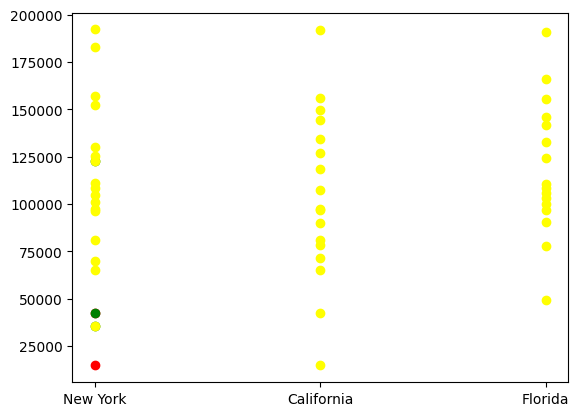

In [3]:
# Plot the data
plt.scatter(X[:, 0], y, color='red')
plt.scatter(X[:, 1], y, color='blue')
plt.scatter(X[:, 2], y, color='green')
plt.scatter(X[:, 3], y, color='yellow')
plt.show()

In [4]:
# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the Test Set Result
> This is the part where you can train your model using regressor.predict

In [7]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

# Output:
# [[Prediction Profit, Real Profit] ...


[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


### Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [8]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


### Getting the final linear regression equation with the values of the coefficients

In [9]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.529248548686
